In [73]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

data=pd.read_csv(r'C:\Users\Haider\Downloads\Three decades of movie data (1986-2016).csv')

pd.set_option('display.max_rows',None)

In [74]:
data.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [75]:
#To check if there is any missing data 

for col in data.columns:
    missing=np.mean(data[col].isnull())
    print('{}: {}%'.format(col, missing)) 

name: 0.0%
rating: 0.010041731872717789%
genre: 0.0%
year: 0.0%
released: 0.0002608242044861763%
score: 0.0003912363067292645%
votes: 0.0003912363067292645%
director: 0.0%
writer: 0.0003912363067292645%
star: 0.00013041210224308815%
country: 0.0003912363067292645%
budget: 0.2831246739697444%
gross: 0.02464788732394366%
company: 0.002217005738132499%
runtime: 0.0005216484089723526%


In [76]:
#Changing nulls to 0 for budget,votes,runtime and gross

data['budget'] = data['budget'].fillna(0)
data['runtime'] = data['runtime'].fillna(0)
data['votes'] = data['votes'].fillna(0)
data['gross'] = data['gross'].fillna(0)

In [77]:
#Data types of our columns

data.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [78]:
#Changing data types of budgets,votes,runtime and gross from float to integers

data['budget']=data['budget'].astype('int64')
data['runtime']=data['runtime'].astype('int64')
data['votes']=data['votes'].astype('int64')
data['gross']=data['gross'].astype('int64')

In [79]:
#Creating a column, 'correct_year', because the released year and year does not match in the data.

data['Year_correct']=data['released'].astype(str).str[:4]

In [80]:
#Ordering data in ascending value with gross value.

data=data.sort_values(by=['gross'], inplace=False , ascending=False)

<AxesSubplot:xlabel='budget', ylabel='gross'>

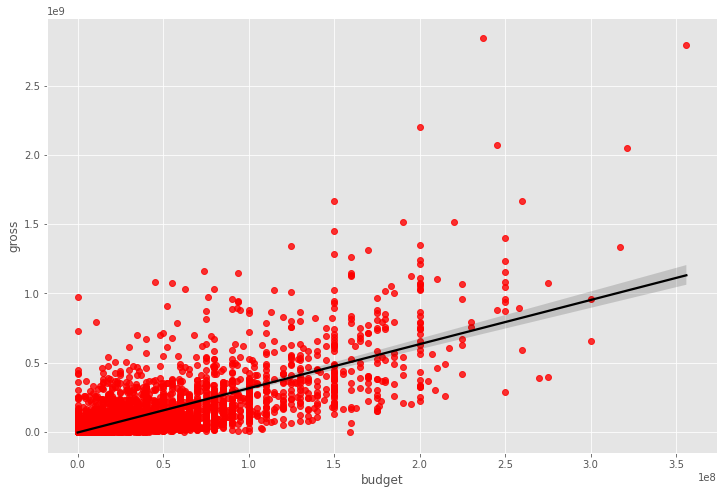

In [81]:
#Scatter plot of budget vs gross using sea-born.

sns.regplot(x='budget',y='gross',data=data, scatter_kws={'color':'red'},line_kws={'color':'black'})

Text(87.0, 0.5, 'Movie Features')

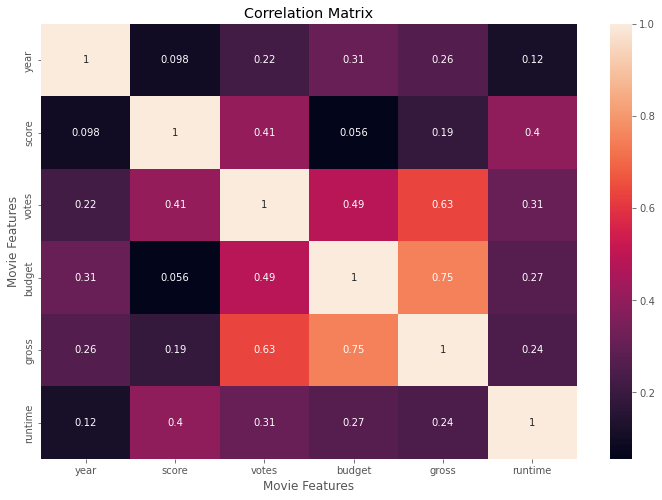

In [82]:
#Visualizing the correlation matrix.

correlation_matrix=data.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Matrix")
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

In [83]:
#Converting the string values into numerical codes.

data_=data
       
data_

for col in data_.columns:
    if data_[col].dtype == 'object':
        data_[col]=data_[col].astype('category')
        data_[col]= data_[col].cat.codes
data_ .head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year_correct
5445,533,5,0,2009,696,7.8,1100000,1155,1778,2334,55,237000000,2847246203,2253,162,10
7445,535,5,0,2019,183,8.4,903000,162,743,2241,55,356000000,2797501328,1606,181,8
3045,6896,5,6,1997,704,7.8,1100000,1155,1778,1595,55,200000000,2201647264,2253,194,10
6663,5144,5,0,2015,698,7.8,876000,1125,2550,524,55,245000000,2069521700,1540,138,10
7244,536,5,0,2018,192,8.4,897000,162,743,2241,55,321000000,2048359754,1606,149,8


Text(86.09375, 0.5, 'Movie Features')

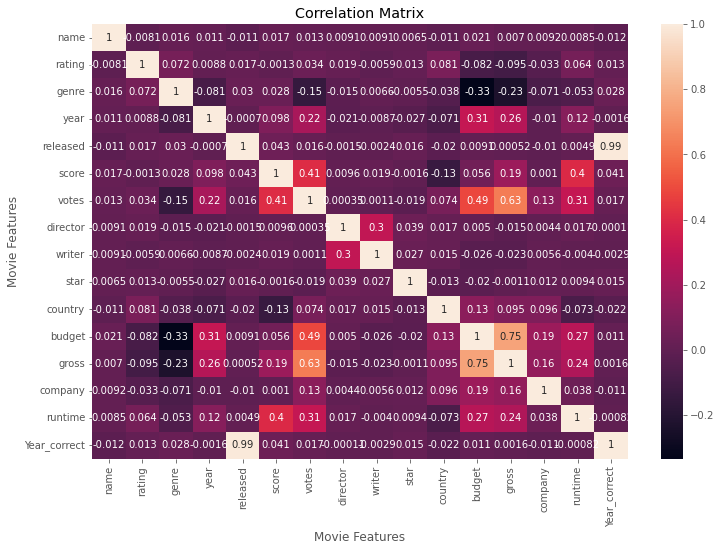

In [84]:
#Visualizing the correlation matrix (including the converted numerized string values).

correlation_matrix=data_.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Matrix")
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

In [85]:
#Unstacking the correlation matrix.

correlation_matrix=data_.corr()
correlational_pairs=correlation_matrix.unstack()
sort_corr=correlational_pairs.sort_values()
sort_corr.head()

genre   budget   -0.334021
budget  genre    -0.334021
genre   gross    -0.234297
gross   genre    -0.234297
genre   votes    -0.145296
dtype: float64

In [86]:
#Highly correlated data (greater than 0.5 and less than 1).

high_corr=sort_corr[(sort_corr>0.5) & (sort_corr<1)]
high_corr

gross         votes           0.632870
votes         gross           0.632870
gross         budget          0.750157
budget        gross           0.750157
released      Year_correct    0.993694
Year_correct  released        0.993694
dtype: float64

In [87]:
#Results:

#The pair of (gross, votes) and (gross, budget) have high correlation (which was unexpected :)).
#Like already shown before, budget and gross have high correlation.
#Company has low correaltion.